In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
import descartes
import rtree
import matplotlib.pyplot as plt
import scipy.stats as sci
import seaborn as sns
import mapclassify
import statsmodels.api as sm
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

AxesSubplot(0.153359,0.125;0.718281x0.755)


,address,parcel_id,contractor,price,funding_so,demolition,commercial,council_di,neighborho,emergency_,street_num,street_dir,street_nam,street_typ,block_rang,ObjectId,geometry,year
0,14877 Wilfred,21011199.,Salenbien Trucking & Excavating Inc.,20258.4,HHF,2018-04-11T00:00:00.000Z,No,4,Outer Drive-Hayes,No,14877,None,WILFRED,St,14700-14899 Wilfred St,1,POINT (-82.96762 42.41941),2018
1,19960 Mccormick,21080155.,"Adamo Group, Inc.",16019.2,Non-HHF,2019-11-26T00:00:00.000Z,No,4,Moross-Morang,No,19960,None,MCCORMICK,St,19900-20199 McCormick St,2,POINT (-82.93697 42.42875),2019


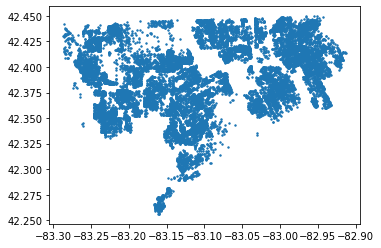

In [2]:
#Import demolition data
demos=gpd.read_file('Completed_Residential_Demolitions/Completed_Residential_Demolitions.shp')
demos['year']=pd.to_datetime(demos['demolition']).apply(lambda x: x.year.astype(int))
print(demos.plot(markersize=2))
demos.head(2) #look at it

In [3]:
sls=pd.read_csv('Side_Lots_Sold.csv', dtype={'parcel_id' : str})

In [4]:
sls_sold=sls[['parcel_id','sale_status']]

In [5]:
demo_sls=pd.merge(demos,sls_sold, how='left', left_on='parcel_id', right_on='parcel_id')

In [6]:
demo_sls.groupby('sale_status')['parcel_id'].count()

sale_status
Applications Received       1
Closed                   3666
Name: parcel_id, dtype: int64

In [7]:
sls[sls['parcel_id'].str.startswith('0')]

,X,Y,actual_closing_date,sale_status,address,parcel_id,program,neighborhood,council_district,buyer_status,final_sale_price,purchaser_type,street_number,street_direction,street_name,street_type,block_range,ObjectId
6,-83.101132,42.376058,2017-03-17T00:00:00.000Z,Closed,1982 Clairmount,08002719.,Side Lot,North LaSalle,5,Selected,100,NaN,1982,NaN,CLAIRMOUNT,St,1915-2199 Clairmount St,3007
12,-83.109508,42.443521,2019-08-08T00:00:00.000Z,Closed,20221 Fayette,09025172.,Side Lot,Nolan,3,Selected,100,NaN,20221,NaN,FAYETTE,St,20180-20409 Fayette St,3013
22,-83.098395,42.377054,2016-03-02T00:00:00.000Z,Closed,1692 Clairmount,08002735.,Side Lot,Herman Kiefer,5,Selected,100,NaN,1692,NaN,CLAIRMOUNT,St,1600-1899 Clairmount St,3023
23,-83.097395,42.377412,2016-10-24T00:00:00.000Z,Closed,1634 Clairmount,08002745.,Side Lot,Herman Kiefer,5,Selected,100,NaN,1634,NaN,CLAIRMOUNT,St,1600-1899 Clairmount St,3024
24,-83.096386,42.377770,2016-04-21T00:00:00.000Z,Closed,1548 Clairmount,06002267.,Side Lot,Herman Kiefer,5,Selected,100,NaN,1548,NaN,CLAIRMOUNT,St,1400-1599 Clairmount St,3025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14355,-83.069956,42.410700,2017-08-24T00:00:00.000Z,Closed,13168 Mackay,09012929.,Side Lot,Campau/Banglatown,3,Selected,100,NaN,13168,NaN,MACKAY,St,12525-13198 Mackay St,11935
14365,-83.108737,42.425816,2016-09-14T00:00:00.000Z,Closed,487 W Margaret,01005794.,Side Lot,Grixdale Farms,2,Selected,100,NaN,487,W,MARGARET,St,400-599 W Margaret St,11945
14369,-83.108959,42.425811,2016-02-10T00:00:00.000Z,Closed,499 W Margaret,01005796.,Side Lot,Grixdale Farms,2,Selected,100,NaN,499,W,MARGARET,St,400-599 W Margaret St,11949
14396,-83.069526,42.409112,2019-05-08T00:00:00.000Z,Closed,12501 Mackay,09013473.,Side Lot,Campau/Banglatown,3,Selected,100,NaN,12501,NaN,MACKAY,St,12355-13098 Mackay St,11976


In [8]:
sls[sls['parcel_id'] == '02001651.']

,X,Y,actual_closing_date,sale_status,address,parcel_id,program,neighborhood,council_district,buyer_status,final_sale_price,purchaser_type,street_number,street_direction,street_name,street_type,block_range,ObjectId
5501,-83.089532,42.392004,2016-07-06T00:00:00.000Z,Closed,67 Webb,02001651.,Side Lot,Gateway Community,5,Selected,100,NaN,67,NaN,WEBB,St,1-599 Webb St,502


In [9]:
demos[demos['parcel_id']== '02001651.']

,address,parcel_id,contractor,price,funding_so,demolition,commercial,council_di,neighborho,emergency_,street_num,street_dir,street_nam,street_typ,block_rang,ObjectId,geometry,year
93,67 Webb,02001651.,MCM,12344.0,HHF,2014-07-25T00:00:00.000Z,No,5,Gateway Community,No,67,None,WEBB,St,1-599 Webb St,94,POINT (-83.08953 42.39200),2014


In [10]:
dlbao=pd.read_csv('DLBA_Owned_Properties_0.csv', dtype={'parcel_id' : str})

In [11]:
dlbao_lim=dlbao[['parcel_id','name']]

In [12]:
demo_sls_dlba=pd.merge(demo_sls,dlbao_lim,how='left', left_on='parcel_id',right_on='parcel_id')

In [13]:
demo_sls_dlba['status'] = np.where(demo_sls_dlba['sale_status'] == 'Closed','SLS',np.where(demo_sls_dlba['name'].notnull(),'DLBA_Owned','NA'))

In [14]:
demo_sls_dlba.groupby('status')['parcel_id'].count()

status
DLBA_Owned    15403
NA             1393
SLS            3666
Name: parcel_id, dtype: int64

In [15]:
partner=pd.read_csv('DLBA_Partner_Sales_0.csv', dtype={'parcel_id' : str})

In [16]:
partner.program.unique()

array(['Community Partner & Projects'], dtype=object)

In [17]:
partner_lim=partner[['parcel_id','program']]

In [18]:
demo_sls_dlba_partner=pd.merge(demo_sls_dlba,partner_lim, how='left',left_on='parcel_id',right_on='parcel_id')

In [19]:
demo_sls_dlba_partner['stat'] = np.where(demo_sls_dlba_partner['program'].notnull(),'Community Partner',demo_sls_dlba_partner['status'])

In [20]:
demo_sls_dlba_partner[demo_sls_dlba_partner['program'] == 'Community Partner & Projects'].groupby('status').count()

,address,parcel_id,contractor,price,funding_so,demolition,commercial,council_di,neighborho,emergency_,...,street_nam,street_typ,block_rang,ObjectId,geometry,year,sale_status,name,program,stat
status,,,,,,,,,,,,,,,,,,,,,
DLBA_Owned,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
NA,165,165,165,165,165,165,165,165,165,165,...,165,163,164,165,165,165,0,0,165,165


In [21]:
property_status=demo_sls_dlba_partner.groupby('stat')['parcel_id'].count().reset_index()

In [22]:
property_status=property_status.rename(columns={'stat': 'status', 'parcel_id': 'Number of Properties'})

In [23]:
property_status['Percent of Total'] = property_status['Number of Properties']/property_status['Number of Properties'].sum()

In [24]:
property_status

,status,Number of Properties,Percent of Total
0,Community Partner,166,0.008113
1,DLBA_Owned,15402,0.752712
2,NA,1228,0.060014
3,SLS,3666,0.179161


In [25]:
demo_sls_dlba_partner[demo_sls_dlba_partner['stat'] == 'DLBA_Owned'].year.median()

2017.0

In [26]:
partner

,X,Y,address,parcel_id,property_class,actual_closing_date,program,neighborhood,council_district,street_number,street_direction,street_name,street_type,block_range,ObjectId
0,-82.950316,42.388973,3849 Ashland,21062307.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3849.0,NaN,ASHLAND,St,3700-4099 Ashland St,2001
1,-82.949236,42.388268,3780 Ashland,21062131.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3780.0,NaN,ASHLAND,St,3700-4099 Ashland St,2002
2,-82.948578,42.388049,3661 Alter,21063108-14,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3661.0,NaN,ALTER,Rd,3600-4098 Alter Rd,2003
3,-82.950652,42.388751,3830 Manistique,21061163.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3830.0,NaN,MANISTIQUE,St,3700-4099 Manistique St,2004
4,-82.950019,42.388530,3813 Ashland,21062313.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3813.0,NaN,ASHLAND,St,3700-4099 Ashland St,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,-82.950169,42.389671,3892 Ashland,21062150.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3892.0,NaN,ASHLAND,St,3700-4099 Ashland St,1996
2146,-83.121109,42.383409,2997 Monterey,12003672.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Dexter-Linwood,5,2997.0,NaN,MONTEREY,St,2900-3199 Monterey St,1997
2147,-82.949629,42.388859,3826 Ashland,21062139.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3826.0,NaN,ASHLAND,St,3700-4099 Ashland St,1998
2148,-82.950022,42.389449,3874 Ashland,21062147.,Residential-Lot,2016-04-29T00:00:00.000Z,Community Partner & Projects,Fox Creek,4,3874.0,NaN,ASHLAND,St,3700-4099 Ashland St,1999


In [30]:
partner.groupby(['program','neighborhood'])['parcel_id'].count().reset_index()

,program,neighborhood,parcel_id
0,Community Partner & Projects,Airport Sub,65
1,Community Partner & Projects,Aviation Sub,1
2,Community Partner & Projects,Bagley,14
3,Community Partner & Projects,Barton-McFarland,3
4,Community Partner & Projects,Berg-Lahser,2
...,...,...,...
114,Community Partner & Projects,West Virginia Park,3
115,Community Partner & Projects,Wildemere Park,2
116,Community Partner & Projects,Winship,1
117,Community Partner & Projects,Woodbridge,5
